<!-- ### Bernoulli trials -->

### Probability Mass Function
The probability mass function (PMF) of the Binomial distribution is given by:

$$
\begin{align*}
    P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}
\end{align*}
$$

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import matplotlib.colors as mcolors
from scipy import stats

In [65]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.usetex'] = False 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

def show_fig_svg(fig):
    import io
    from IPython.display import SVG, display

    # Save the figure into a string buffer as SVG
    buf = io.StringIO()
    fig.savefig(buf, format='svg')
    buf.seek(0)

    # Display the SVG image
    display(SVG(buf.getvalue()))

In [53]:
# Number of trials
n = 10 
k = np.arange(0, n+1) # Possible number of successes

# We will calculate probabilities for p = 0.1, 0.2, 0.3, 0.4
p_list = np.arange(1, 5, 1) / 10 

# Calculate the probability mass function for each p
pmf_dict = {}
for p in p_list:
    pmf_dict[p] = [stats.binom.pmf(k_, n, p) for k_ in k]

In [68]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

cmap = cmocean.cm.haline
norm = mcolors.Normalize(vmin=0.1, vmax=0.5)

for p in p_list:
    ax.plot(k, pmf_dict[p], "o-", markersize=3, label=fr"n={n}, p={p}", color=cmap(norm(p)))

ax.set_title("", loc='left')
ax.set_xlabel("$k$")
ax.set_ylabel("Probability Mass")

ax.legend(loc='upper right', frameon=True)

fig.tight_layout()
plt.close()

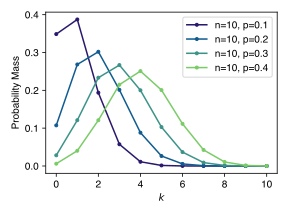

In [69]:
show_fig_svg(fig)

### Cumulative Distribution Function
The cumulative distribution function (CDF) of a random variable $X$ that is binomially distributed is:

$$
\begin{align*}
    P(X \leq k) = \sum_{i=0}^{k} P(X=i) = \sum_{i=0}^{k} \binom{n}{i} p^i (1-p)^{n-i}
\end{align*}
$$

In [55]:
# Calculate the cumulative distribution function for each p
cdf_dict = {}
for p in p_list:
    cdf_dict[p] = [stats.binom.cdf(k_, n, p) for k_ in k]

In [70]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

cmap = cmocean.cm.haline
norm = mcolors.Normalize(vmin=0.1, vmax=0.5)

for p in p_list:
    ax.plot(k, cdf_dict[p], "o-", markersize=3, label=fr"n={n}, p={p}", color=cmap(norm(p)))

ax.set_title("", loc='left')
ax.set_xlabel("$k$")
ax.set_ylabel("CDF")

ax.legend(loc='lower right', frameon=True)

fig.tight_layout()
plt.close()

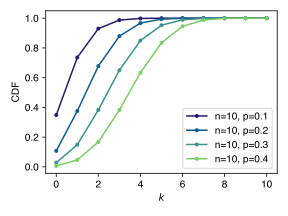

In [71]:
show_fig_svg(fig)

### Mean
The mean of a random variable $X$ that is binomially distributed is:
$$
E[X] = np
$$



In [58]:
def calc_mean_binom(n, p):
    return n * p

In [60]:
mean_dict = {p: calc_mean_binom(n, p) for p in p_list}

In [61]:
print(f"Expected value of X ~ Bin(n={n}, p)")
for p in p_list:
    mean = mean_dict[p]
    print(f"p = {p:.1f}: {mean:.1f}")

Expected value of X ~ Bin(n=10, p)
p = 0.1: 1.0
p = 0.2: 2.0
p = 0.3: 3.0
p = 0.4: 4.0


### Variance

The variance is:
$$
V[X] = np(1-p)
$$

In [62]:
def calc_var_binom(n, p):
    return n * p * (1 - p)

In [63]:
var_dict = {p: calc_var_binom(n, p) for p in p_list}

In [64]:
print(f"Variance of X ~ Bin(n={n}, p)")
for p in p_list:
    var = var_dict[p]
    print(f"p = {p:.1f}: {var:.1f}")

Variance of X ~ Bin(n=10, p)
p = 0.1: 0.9
p = 0.2: 1.6
p = 0.3: 2.1
p = 0.4: 2.4
